# **Transfer Learning**

In [1]:
import numpy as np #For numerical calculations
import pandas as pd

import matplotlib.pyplot as plt #For Visualization

import tensorflow as tf #For Implementation of Deep Learning Models
from tensorflow import keras #Keras library to import raw ingredients for ConvNet Deep Learning Model
from keras import layers, initializers #To add Layers and Weights to the layers, respectively
from keras.models import Sequential #To group a linear stack of layers for ConvNet model
from keras import preprocessing #To perform preprocessing operations on the data to make it ready for model building
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array #To perform Image Data Augmentation and to view the
                                                                                #augmented images by converting them into arrayed format

#Import Various Layers for add fully connected layer, Convolution layer, Pooling Layers, Dropout layer, Flattening the inputs
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.regularizers import l1, l2 #To add penalty as regularizer
from keras.callbacks import EarlyStopping #For Early Stopping the model before running the specified number of epochs

import os #Module to interact with operating system

from warnings import filterwarnings #To ignore warnings
filterwarnings("ignore")

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator

from keras.applications import MobileNetV2, ResNet50, MobileNet, VGG16

In [2]:
image_size = (224,224)
batch_size = 128

### **Functions to Plot Loss and Accuracy**

In [3]:
# Function to plot loss
def plot_loss(history):
    history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch
    loss_values = history_dict['loss']   # training loss
    val_loss_values = history_dict['val_loss'] # validation loss

    epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

    # code to plot the results
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss_values, 'b', label="Training Loss")
    plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.xticks(epochs)
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Function to plot accuracy
def plot_accuracy(history):
    history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch
    acc_values = history_dict['categorical_accuracy']
    val_acc_values = history_dict['val_categorical_accuracy']
    
    epochs = range(1, len(acc_values)+1)  #creates list of integers to match the number of epochs of training
    
    # code to plot the results
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
    plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.xticks(epochs)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show() 

### **Create and Evaluate the Model**

In [4]:
def baseline_model():
    tf.random.set_seed(1) #Set seed to get same results for each run
    model = Sequential() #Invoke Sequential Model

    ###########################
    # ARCHITECTURE OF CONVNET #
    ###########################

    ############################################################################################
    #Activation function for input, ConvNet layers, and Fully Connected layer is set as 'relu' #
    #For Output layer, activation function is set as 'sigmoid' #################################
    ############################################################################################


    #Read Input data of the shape 148x148x3 where n_c=3 and create a convolution layer of 64 filters with 3x3 dimensions and with valid padding
    #here, activation function is set to 'relu'
    
    pretrained = MobileNet(input_shape=(224,224,3), include_top=False, pooling="max")

    model = Sequential()
    model.add(pretrained)
    
    #For Flattening the input
    model.add(Flatten())
    
    #Add convolution layer of 128 filters with 3x3 dimensions and with valid padding
    #model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='valid', activation='relu', input_shape=(128, 224,224,3)))
    #Add MaxPooling Layer of size 2x2
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    #model.add(Dropout(0.20))
    #model.add(BatchNormalization())
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.10))
    
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.20))
    #model.add(BatchNormalization())
    model.add(Dense(7, activation="sigmoid"))
    
    return model

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255.) #Image Data Generator for training set. rescale will scale the pixels in the range 0-1

test_datagen = ImageDataGenerator(rescale=1/255.) #Image Data Generator for test set. rescale will scale the pixels in the range 0-1

In [6]:
#Create dataset for training using flow_from_directory method of ImageDataGenerator class. 
#Here, the class mode is set to binary as our classification problem is binary in nature.
train_ds = train_datagen.flow_from_directory('data/image_train', target_size=image_size, batch_size=batch_size,
                                      seed=465, class_mode='categorical')

Found 6009 images belonging to 7 classes.


In [7]:
#Create dataset for validation using flow_from_directory method of ImageDataGenerator class. 
#Here, the class mode is set to binary as our classification problem is binary in nature.
validation_ds = test_datagen.flow_from_directory('data/image_val', target_size=image_size, batch_size=batch_size,
                                      seed=465, class_mode='categorical')

Found 2003 images belonging to 7 classes.


In [8]:
#Create dataset for test using flow_from_directory method of ImageDataGenerator class. 
#Here, the class mode is set to binary as our classification problem is binary in nature.
test_ds = test_datagen.flow_from_directory('data/image_test', target_size=image_size, batch_size=1,
                                      seed=465, class_mode='categorical')

Found 2003 images belonging to 7 classes.


In [9]:
#Retrieve training images and labels (in arrayed format) using next() method
train_images, train_labels = next(train_ds)

In [10]:
#next(validation_ds)[0].shape

#### **Plot the images**

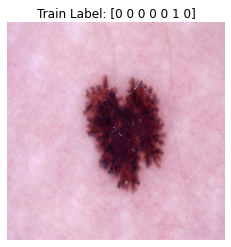

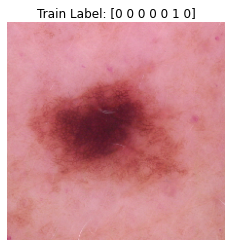

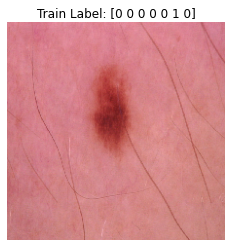

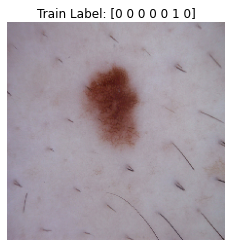

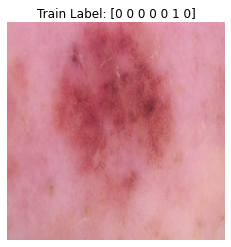

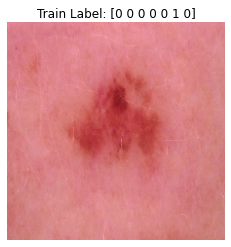

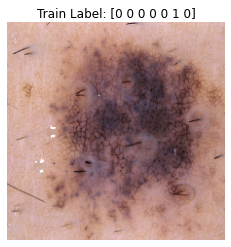

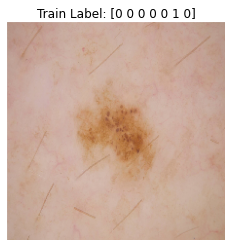

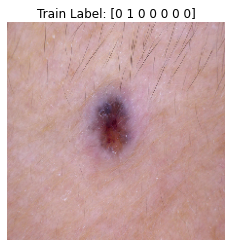

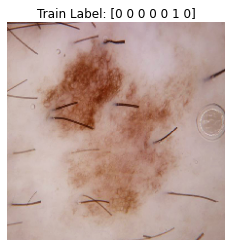

In [11]:
#This code will plot the images from training set with their class labels
for i in range(10):
    plt.imshow(train_images[i])
    plt.axis("off")
    plt.title("Train Label: " + str(train_labels[i].astype("int8")))
    plt.show()

In [12]:
#Instantiate the model
model = baseline_model()

#### **Print the model summary**

In [13]:
#Print the summary of the model to view the parameters
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                

#### **Compile and Evaluate the model on Training and Validation Sets**

In [14]:
#Define the optimizers for model
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
rms = tf.keras.optimizers.RMSprop(learning_rate=0.01)

callback = EarlyStopping(monitor='accuracy', mode='max', patience=5) #Setting up criteria for EarlyStopping

#Compile the model with optimizers, loss and metrics
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

#Fit the model on Training Data and evaluate it on validation set
#Here, we are running our architecture for 20 epochs with batch_size=20; This would give us 100//20=5 iterations for training set
# and 30//20=1 iteration for validation set
history = model.fit(train_ds, epochs=20, validation_data=validation_ds, 
                    batch_size=batch_size,
                    #callbacks=callback,
                    #steps_per_epoch=100 // (batch_size*4), validation_steps = 30 // (batch_size*4),
                    verbose=1)


Epoch 1/20
47/47 [==============================] - 689s 15s/step - loss: 1.1751 - categorical_accuracy: 0.6617 - val_loss: 2.0377 - val_categorical_accuracy: 0.6695
Epoch 2/20
47/47 [==============================] - 614s 13s/step - loss: 0.7652 - categorical_accuracy: 0.7244 - val_loss: 2.2679 - val_categorical_accuracy: 0.6695
Epoch 3/20
47/47 [==============================] - 596s 13s/step - loss: 0.6243 - categorical_accuracy: 0.7693 - val_loss: 0.8938 - val_categorical_accuracy: 0.6790
Epoch 4/20
47/47 [==============================] - 594s 13s/step - loss: 0.5188 - categorical_accuracy: 0.8106 - val_loss: 0.8165 - val_categorical_accuracy: 0.7374
Epoch 5/20
47/47 [==============================] - 591s 13s/step - loss: 0.4471 - categorical_accuracy: 0.8454 - val_loss: 0.8028 - val_categorical_accuracy: 0.7084
Epoch 6/20
47/47 [==============================] - 588s 13s/step - loss: 0.3781 - categorical_accuracy: 0.8715 - val_loss: 0.6481 - val_categorical_accuracy: 0.7629
Epoc

### **Report Accuracy on Test Set**

In [15]:
test_loss, test_accuracy = model.evaluate(test_ds, batch_size=1) #Evaluate the model on testing data

print(f'Accuracy of Test Set: {100*test_accuracy:.2f}%')
print(f'Loss on Test Set: {test_loss:.4f}')

2003/2003 [==============================] - 53s 27ms/step - loss: 1.0218 - categorical_accuracy: 0.8283
Accuracy of Test Set: 82.83%
Loss on Test Set: 1.0218


#### **Plot Loss and Accuracy**

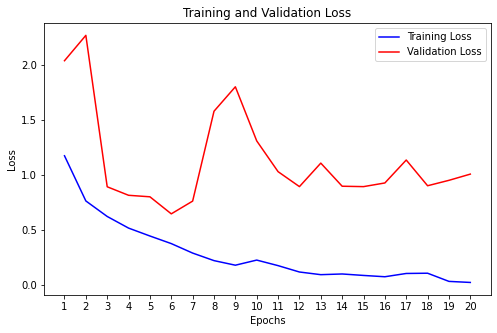

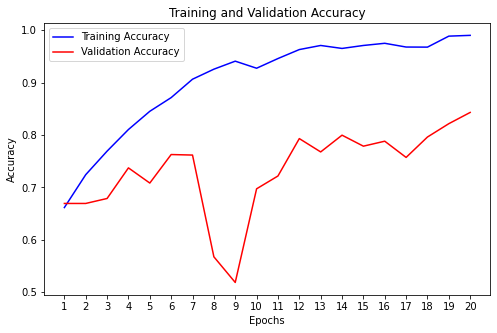

In [16]:
plot_loss(history) #Plot loss for training and validation sets
plot_accuracy(history) #Plot accuracy for training and validation sets

## **Save Model**

In [19]:
model.save('models/skin_model_tl_1', save_format='tf')
print("Saved Model to Disk")

INFO:tensorflow:Assets written to: models/skin_model_tl_1\assets
Saved Model to Disk


In [20]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

# load model
model = load_model('models/skin_model_tl_1')
# summarize model.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1024)              3228864   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                